In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터의 확인과 검증셋

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [4]:
#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 3s 35ms/step - loss: 5.1629 - accuracy: 0.1442 - val_loss: 2.1991 - val_accuracy: 0.1515
Epoch 2/50
8/8 [===

In [5]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9362
Test accuracy: 0.9361538290977478


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델의 저장 설정 및 실행

In [7]:
# 모델 저장의 조건을 설정합니다.
modelpath="/content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/01-0.6669.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/02-0.7592.hdf5

Epoch 3: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/03-0.7569.hdf5

Epoch 4: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/04-0.7592.hdf5

Epoch 5: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/05-0.7669.hdf5

Epoch 6: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/06-0.7769.hdf5

Epoch 7: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/07-0.8085.hdf5

Epoch 8: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/08-0.8438.hdf5

Epoch 9: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/09-0.8738.hdf5

Epoch 10: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/10-0.8846.hdf5

Epoch 11: saving model to /content/drive/MyDrive/kdt_231026/m6_dl/data/model/all/11-0.9046.hdf5

Epoch 12: saving model to /content/dr

In [9]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9585
Test accuracy: 0.9584615230560303


## 3. 그래프로 과적합 확인하기

In [10]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [11]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.139119,0.945343,0.153935,0.943077
1,0.136722,0.946369,0.155460,0.940769
2,0.136266,0.945343,0.155676,0.942308
3,0.136714,0.949448,0.153247,0.940769
4,0.134640,0.949192,0.154673,0.940000


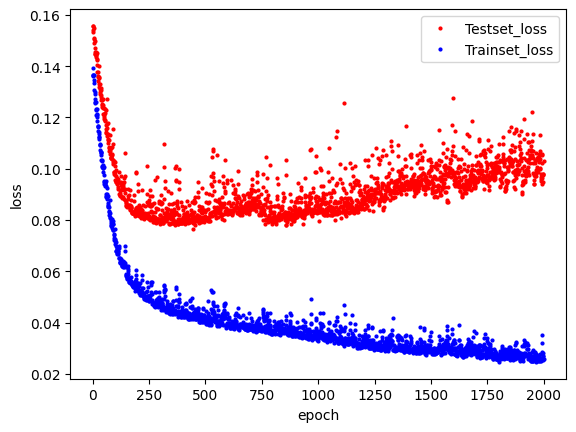

In [12]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m6_dl/data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

### 학습의 자동 중단 및 최적화 모델 저장

In [14]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="/content/drive/MyDrive/kdt_231026/m6_dl/data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
1/8 [==>...........................] - ETA: 9s - loss: 11.9335 - accuracy: 0.2840

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 2s 155ms/step - loss: 9.6521 - accuracy: 0.2489 - val_loss: 6.2694 - val_accuracy: 0.2585
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 3.6397 - accuracy: 0.2802 - val_loss: 0.7880 - val_accuracy: 0.6362
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4462 - accuracy: 0.7762 - val_loss: 0.4157 - val_accuracy: 0.8254
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.4272 - accuracy: 0.8265 - val_loss: 0.4425 - val_accuracy: 0.8385
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.4029 - accuracy: 0.8576 - val_loss: 0.3285 - val_accuracy: 0.8885
Epoch 6/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2809 - accuracy: 0.9115 - val_loss: 0.2253 - val_accuracy: 0.9269
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.2496 - accuracy: 0.9284 - val_loss: 0.2265 - val_accuracy: 0.9231
Epoch 8/2000
8/8 [=========

In [15]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0502 - accuracy: 0.9815
Test accuracy: 0.9815384745597839
